In [18]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
import pandas as pd

from rbf import RBFRegressor

модели при gamma=1/2*bw**2 эквивалентны. В тестах (test_rbf.py) на этом же датасете дают одинаковый скор

In [19]:
df = pd.read_csv('../../../data/breast-cancer-wisconsin.csv')
y = df['diagnosis'].map({'M':1, 'B':0}).values
X = df.drop(columns=['id', 'diagnosis']).values

In [20]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=41, stratify=y
)

In [21]:
bw, a = 1.0, 1.0

In [22]:
my_rbf = RBFRegressor(bandwidth=bw, a=a)
my_rbf.fit(X_tr, y_tr)
my_pr = my_rbf.predict(X_te)

In [23]:
skl_rkf = KernelRidge(kernel='rbf', gamma=1/(2*bw**2), alpha=a)
# gamma - 
skl_rkf.fit(X_tr, y_tr)
skl_pr = skl_rkf.predict(X_te)

In [24]:
from sklearn.metrics import roc_curve, auc
fpr_my, tpr_my, _ = roc_curve(y_te, my_pr)
fpr_skl, tpr_skl, _ = roc_curve(y_te, skl_pr)
auc_my  = auc(fpr_my, tpr_my)
auc_skl = auc(fpr_skl, tpr_skl)

import matplotlib.pyplot as plt

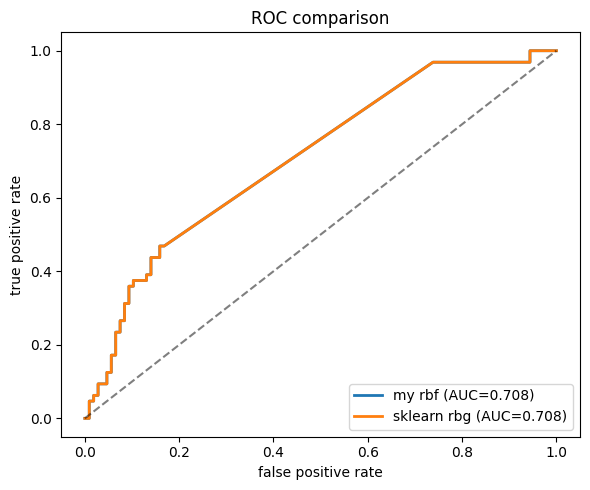

In [25]:
plt.figure(figsize=(6,5))
plt.plot(fpr_my, tpr_my, label=f'my rbf (AUC={auc_my:.3f})', lw=2)
plt.plot(fpr_skl, tpr_skl, label=f'sklearn rbg (AUC={auc_skl:.3f})', lw=2)
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC comparison')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
